![image info](https://ineuron.ai/images/ineuron-logo.png)

# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Create Dataframe
df = pd.read_csv('Data/jfk_weather_cleaned.csv')
# Print shape of dataset
print(df.shape)

(75083, 11)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print("features which has null values are : %s" % features_with_na)
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features which has null values are : []


**We can see there is no columns with null values.**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [3]:
df.duplicated().sum()

0

**Drop the columns which we could see in the EDA notebook are not either important or having high correlation**

In [4]:
columns_to_drop = ['WETBULBTEMPF','DewPointTempF','StationPressure','Precip','DATE']

df = df.drop(columns=columns_to_drop, axis=1)

In [5]:
#see the dataset now

df.head()

,VISIBILITY,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,6.0,33,92,0,0,29.99
1,6.0,33,96,0,0,29.99
2,5.0,33,96,0,0,29.99
3,5.0,33,96,0,0,29.97
4,5.0,33,92,0,0,29.96


# Feature Engineering

Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy. Effective feature engineering is based on sound knowledge of the business problem and the available data sources.

**Numeric Features**

In [6]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 6


**Categorical Features**

In [7]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete Features**

In [8]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features),"\ncolumns:", discrete_features)

Num of Discrete Features : 1 
columns: ['VISIBILITY']


**Continues Features**

In [9]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

In [10]:
continuous_features

['DRYBULBTEMPF',
 'RelativeHumidity',
 'WindSpeed',
 'WindDirection',
 'SeaLevelPressure']

## Outliers Detection

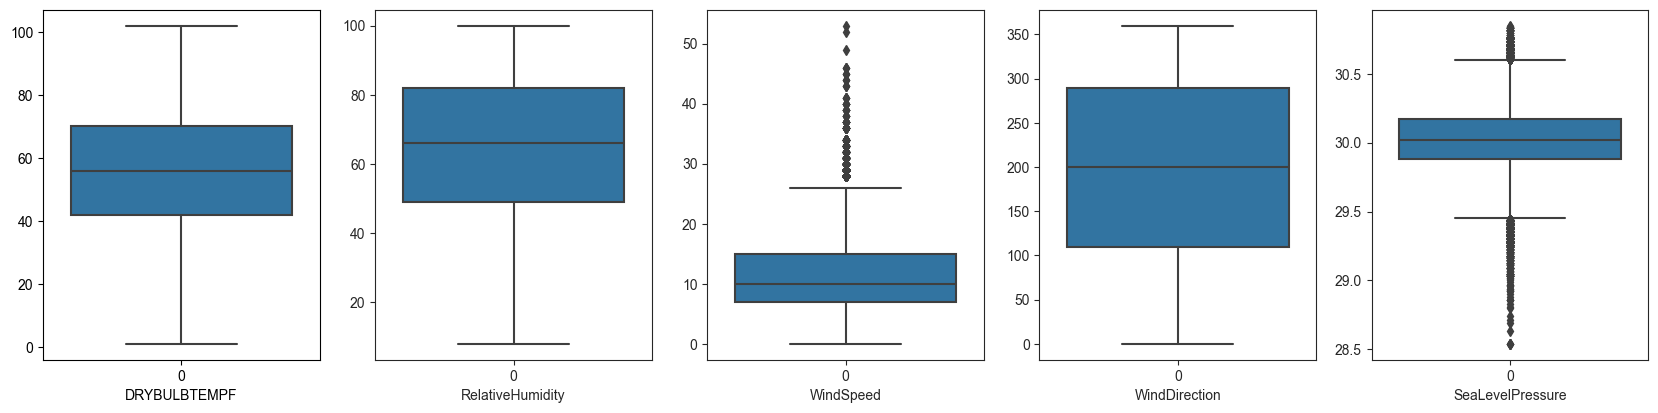

In [11]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

**report**
- We can see, there are no such outliers in `DRYBULBTEMPF`, `RelativeHumidity`, and `WindDirection` Columns
- But there are outliers in  `WindSpeed`, ` SeaLevelPressure` following columns 


**Detecting Outlier and Capping it**

In [12]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df




for col in continuous_features:
    detect_outliers(col=col)


 #### DRYBULBTEMPF ####
percentile25 42.0
percentile75 70.0
Upper limit 112.0
Lower limit 0.0

 #### RelativeHumidity ####
percentile25 49.0
percentile75 82.0
Upper limit 131.5
Lower limit -0.5

 #### WindSpeed ####
percentile25 7.0
percentile75 15.0
Upper limit 27.0
Lower limit -5.0

 #### WindDirection ####
percentile25 110.0
percentile75 290.0
Upper limit 560.0
Lower limit -160.0

 #### SeaLevelPressure ####
percentile25 29.88
percentile75 30.17
Upper limit 30.605000000000004
Lower limit 29.444999999999993


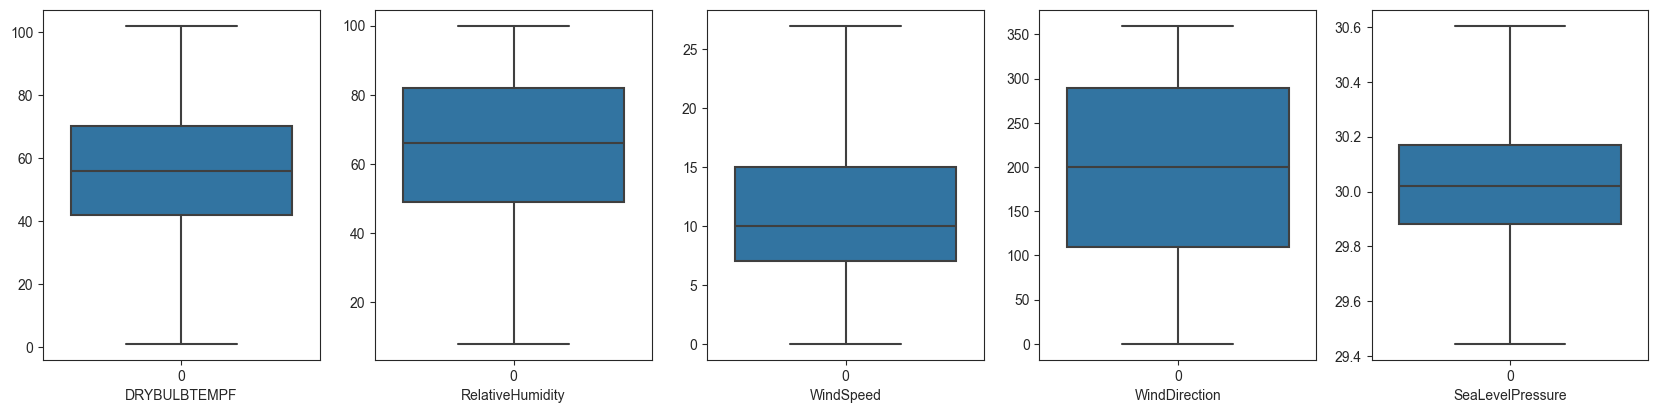

In [13]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 10))

for i in range(len(cont_features)):
        plt.subplot(2,6,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

**Checking Skewness after Outlier Capping**

In [14]:
df[continuous_features].skew(axis=0, skipna=True)

DRYBULBTEMPF       -0.149154
RelativeHumidity   -0.186890
WindSpeed           0.471627
WindDirection      -0.335758
SeaLevelPressure    0.005286
dtype: float64

## Feature Transformation

### Scaling 
- **What is Feature Scaling**
    - Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- **Why we use feature scaling?**
    - the feature scaling was implemented to prevent any skewness in the contour plot of the cost function which affects the gradient descent but the analytical solution using normal equation does not suffer from the same drawback.

- StandardScaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

- PowerTransformer
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

- ColumnTransformer
Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

- SimpleImputer
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

- Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__' .

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
outlier_features = ['WindSpeed', 'SeaLevelPressure'] #we can find the columns which has oitliers in the EDA
numeric_features = [x for x in numeric_features if x not in outlier_features]

### Model Building ( Clustering )

We know that our dataset it unsupervised, that means we don't have such target column. So we will be using clustering algorithms first to cluster the dataset and create target levels out of it. 

- What is Clustering?
> Using a clustering algorithm means you're going to give the algorithm a lot of input data with no labels and let it find any groupings in the data it can. Those groupings are called clusters. A cluster is a group of data points that are similar to each other based on their relation to surrounding data points.

Here for Clustering Problem statement, 4 Algorithms are used.

- K-Means Clustering
- Agglomerative Clustering
- Gaussian Mixture
- DBSCAN

### Create a function for Silhouette score plot

- **What is silhouette score**

The silhouette value is a measure of how similar an object is to its o**wn cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### Elbow Method to find best Clusters for K-Means
- In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

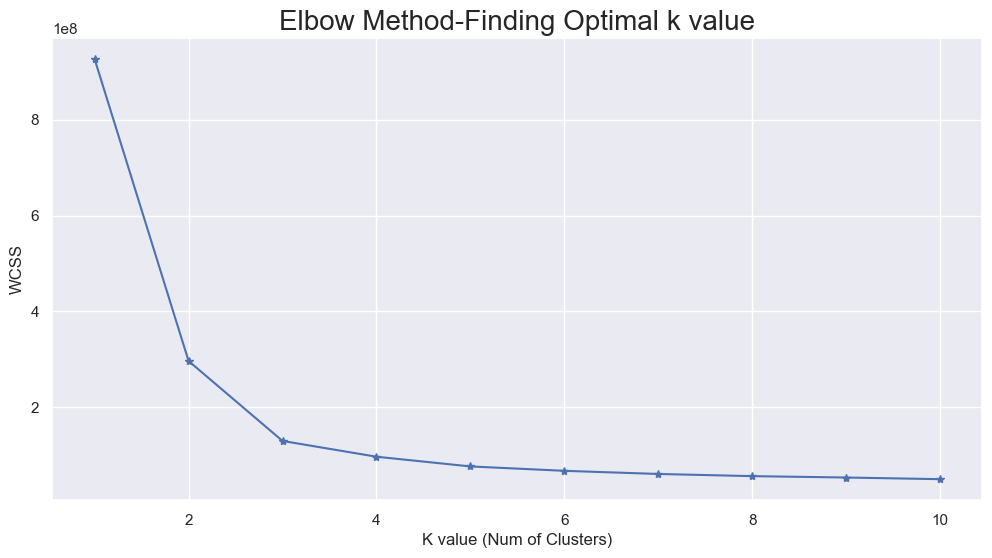

In [26]:
from sklearn.cluster import KMeans


wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

- Here the optimum number of cluster is 3 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.

**Reports:**

* We will use **k = 3**, thus there will be **three clusters** in our dataset.
* We will use **KMeans Algorithm** for clustering.

### Apply Kmeans Clustering with 3 clusters

In [27]:
from kneed import KneeLocator

def select_no_of_clusters(dataframe):

    wcss=[] # initializing an empty list
    try:
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
            kmeans.fit(dataframe) # fitting the data to the KMeans Algorithm
            wcss.append(kmeans.inertia_)
        kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        print('The optimum number of clusters is: '+str(kn.knee)+' . Exited the elbow_plot method of the KMeansClustering class')
        return kn.knee
    except Exception as e:
        print(e)

no_of_clusters = select_no_of_clusters(df)
print("no of clusters is", no_of_clusters)
kmeans = KMeans(n_clusters=no_of_clusters)
kmeans.fit(df)
labels = kmeans.predict(df)
df['Cluster'] = labels

The optimum number of clusters is: 3 . Exited the elbow_plot method of the KMeansClustering class
no of clusters is 3


## Apply standardscaler

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2)

X_train = train_set.drop(columns=['VISIBILITY', 'Cluster'])
y_train = train_set[['VISIBILITY']]
X_test = test_set.drop(columns=['VISIBILITY', 'Cluster'])
y_test = test_set[['VISIBILITY']]

preprocessor = StandardScaler()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
import dask.distributed as distributed

cluster = distributed.LocalCluster()
client = distributed.Client(cluster)
client.restart()



#let's import the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score



models = {}
models['linear_regression'] = LinearRegression()
models['ridge_regression'] = Ridge()
models['lasso_regression'] = Lasso()
models['elasticnet'] = ElasticNet()
models['decision_tree_regressor'] = DecisionTreeRegressor()
models['random_forest_regressor'] = RandomForestRegressor()

def select_best_model(models = models, x_train = X_train, y_train = y_train, x_test = X_test, y_test = y_test):
    
    models_details = []
    for model_name, model in models.items():
        model_detail = {}
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        model_score = r2_score(y_test, y_pred)
        model_detail['model_name'] = model_name
        model_detail['model_score'] = model_score
        print("%s model is trained" % model_name)

        models_details.append(model_detail)

    return models_details


models_details = select_best_model()
models_details
        




2023-04-25 17:56:30,490 - distributed.nanny - WARNING - Restarting worker
2023-04-25 17:56:30,499 - distributed.nanny - WARNING - Restarting worker
2023-04-25 17:56:30,505 - distributed.nanny - WARNING - Restarting worker
2023-04-25 17:56:30,517 - distributed.nanny - WARNING - Restarting worker


linear_regression model is trained
ridge_regression model is trained
lasso_regression model is trained
elasticnet model is trained
decision_tree_regressor model is trained
random_forest_regressor model is trained


[{'model_name': 'linear_regression', 'model_score': 0.2581617637628123},
 {'model_name': 'ridge_regression', 'model_score': 0.2581615683940305},
 {'model_name': 'lasso_regression', 'model_score': 0.007744310756867878},
 {'model_name': 'elasticnet', 'model_score': 0.12157770407618085},
 {'model_name': 'decision_tree_regressor', 'model_score': 0.30193333821229607},
 {'model_name': 'random_forest_regressor', 'model_score': 0.6208308018950268}]

**As seen, we will continue our model training with randomforest regressir**

# Read model.yml file to get randomforest params

In [20]:
from src.utils.main_utils import MainUtils

import os
os.chdir("..")
utils = MainUtils()
rf_grid = utils.read_yaml_file("config/model.yaml")['model_selection']['model']['Random Forest Regression']['search_param_grid']

In [21]:
rf_grid

{'n_estimators': [10, 20, 50, 100, 130],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 6, 10],
 'bootstrap': [True, False]}

# let's start CV operation on top of randomforest

In [22]:
from sklearn.model_selection import GridSearchCV
import joblib

with joblib.parallel_backend('dask'):
    model_grid = GridSearchCV(
        RandomForestRegressor(), rf_grid, 
        cv = 2,
        n_jobs = -1 ,
        verbose=3 )
    model_grid.fit(X_train,y_train)


Fitting 2 folds for each of 300 candidates, totalling 600 fits


## Best params for randomforest

In [23]:
best_params = model_grid.best_params_
rf_model = RandomForestRegressor(**best_params)

## Let's train our model

In [31]:

def train_model():
    models = {}
    preprocessor = StandardScaler()
    list_of_clusters:list = train_set['Cluster'].unique()
    model = []
    for cluster_no in list_of_clusters:
        train_set_cluster = train_set[train_set['Cluster'] == cluster_no]
        test_set_cluster = test_set[test_set['Cluster'] == cluster_no]

        X_train = train_set_cluster.drop(columns = ['VISIBILITY', 'Cluster'])
        X_test = test_set_cluster.drop(columns = ['VISIBILITY', 'Cluster'])
        
        X_train = preprocessor.fit_transform(X_train)
        X_test = preprocessor.transform(X_test)
        
        y_train = train_set_cluster[['VISIBILITY']]
        y_test = test_set_cluster[['VISIBILITY']]
    #     print(f"Training on cluster_no {cluster_no}")
    #     model = rf_model
        
    #     model.fit(X_train, y_train)
    #     y_pred = model.predict(X_test)
        
    #     score = r2_score(y_test,y_pred)
    #     print(f"score for cluster no {cluster_no} is: {score}")
        
    #     models[f"model_{cluster_no}"] = model
    # return models

        print(X_train, y_train, X_test, y_test)
        
        
models = train_model()

[[ 2.73388505 -1.3145172  -1.87816228  0.6556016  -0.40254837]
 [-1.12307085 -0.97521303 -0.14939028 -0.2906603   0.9119458 ]
 [-1.56386581 -0.24005401  0.71499573 -1.55234283  2.01442478]
 ...
 [-0.46187841 -0.07040193 -0.84089908  0.02476033 -1.20820608]
 [ 0.86050647  0.32545293  0.19636413  0.34018096 -1.71704254]
 [-1.01287211 -1.08831442  0.02348692 -0.2906603   1.03915491]]        VISIBILITY
13640        10.0
34690        10.0
70896        10.0
8973         10.0
4730          8.0
...           ...
59587        10.0
8187         10.0
27755        10.0
64550        10.0
8215         10.0

[21618 rows x 1 columns] [[-0.40677904 -0.52280748  1.06075013 -0.60608094 -0.06332407]
 [ 1.3564008   0.26890224 -1.53240788  0.6556016   0.19109416]
 [ 0.64010899  2.30472722 -1.53240788  1.60186349 -0.74177267]
 ...
 [-0.847574    1.28681473  0.54211853  0.34018096 -1.46262431]
 [-0.79247463  1.28681473 -1.35953068  0.6556016   2.58686579]
 [ 0.91560584 -0.69245956  0.02348692  0.34018096 -0.0

2023-04-25 18:29:25,222 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53673', name: 1, status: running, memory: 0, processing: 0>
2023-04-25 18:29:25,225 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:56421', name: 2, status: running, memory: 0, processing: 0>
2023-04-25 18:29:25,228 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53677', name: 3, status: running, memory: 0, processing: 0>
2023-04-25 18:29:25,230 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:56431', name: 0, status: running, memory: 0, processing: 0>
2023-04-25 18:29:25,241 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:53673'.
2023-04-25 18:29:25,248 - distributed.scheduler

In [25]:
models

{'model_1': RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=6,
                       n_estimators=130),
 'model_2': RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=6,
                       n_estimators=130),
 'model_0': RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=6,
                       n_estimators=130)}

### Final report
- As we got the EDA results, we used that same approaches here also. We dropped some features to avoid multicollinearity
- The data had outliers and multicollinearity, We created methods to handle those things
- Kmeans Clustering algorithm we have applied and amongst many ml models, randomforest performed well.